# Data van 1 file

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
pd.options.mode.chained_assignment = None
import glob

In [8]:
### TRYING SOME STUFF ON ONE FILE

data = pd.read_csv('C:/Users/20175848/Documents/waterschap-datachallenge/data/den bosch/sewer_data_db/data_pump_flow/debieten en draaiuren 01012018 - 30042018.csv', sep = ';')
data = data.drop(data.index[0:4])
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data.columns = data.iloc[0]
data = data.drop(data.index[0])
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data['TIJDSTIP'] = pd.to_datetime(data['TIJDSTIP'], format = '%d-%m-%Y (%H:%M uur)')


In [3]:
#data.groupby('LOCATIE').apply(lambda x: x.sort_values(['TIJDSTIP']))
#debiet = data[data['MEETPUNT'] == 'Debiet ']
data2 = data.groupby(['LOCATIE', 'MEETPUNT'])

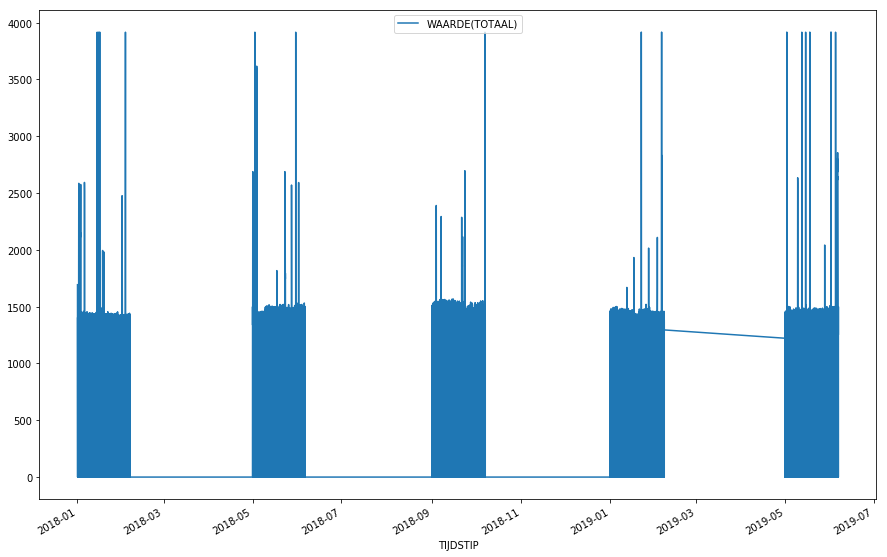

In [7]:
## Making a plot of the debiet for all pumps, there is only one so only one plot

for i, df in data2:
    if df['MEETPUNT'].all() == 'Debiet ':
        df['WAARDE(TOTAAL)'] = df['WAARDE(TOTAAL)'].astype(int)
        df.plot(x= 'TIJDSTIP', y = 'WAARDE(TOTAAL)', figsize=(15,10))

# Data van alle files

In [9]:
### READING AND PREPROCESSING FOR ALL FILES

path = 'C:/Users/20175848/Documents/waterschap-datachallenge/data/den bosch/sewer_data_db/data_pump_flow/'
all_files = glob.glob(path + '/*.csv')
data = pd.DataFrame()
for filename in all_files:
    temp = pd.read_csv(filename, sep = ';')
    temp = temp.drop(temp.index[0:4])
    data = pd.concat([data, temp])

data = data.reset_index()
data = data.drop(['index'], axis = 1)
data.columns = data.iloc[0]
data = data.drop(data.index[0])
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data = data[data['LOCATIE'] != 'LOCATIE']
data['TIJDSTIP'] = pd.to_datetime(data['TIJDSTIP'], format = '%d-%m-%Y (%H:%M uur)')


0        Eindgemaal 003: Helftheuvelweg
1        Eindgemaal 003: Helftheuvelweg
2        Eindgemaal 003: Helftheuvelweg
3        Eindgemaal 003: Helftheuvelweg
4        Eindgemaal 003: Helftheuvelweg
5        Eindgemaal 003: Helftheuvelweg
6        Eindgemaal 003: Helftheuvelweg
7        Eindgemaal 003: Helftheuvelweg
8        Eindgemaal 003: Helftheuvelweg
9        Eindgemaal 003: Helftheuvelweg
10       Eindgemaal 003: Helftheuvelweg
11       Eindgemaal 003: Helftheuvelweg
12       Eindgemaal 003: Helftheuvelweg
13       Eindgemaal 003: Helftheuvelweg
14       Eindgemaal 003: Helftheuvelweg
15       Eindgemaal 003: Helftheuvelweg
16       Eindgemaal 003: Helftheuvelweg
17       Eindgemaal 003: Helftheuvelweg
18       Eindgemaal 003: Helftheuvelweg
19       Eindgemaal 003: Helftheuvelweg
20       Eindgemaal 003: Helftheuvelweg
21       Eindgemaal 003: Helftheuvelweg
22       Eindgemaal 003: Helftheuvelweg
23       Eindgemaal 003: Helftheuvelweg
24       Eindgemaal 003: Helftheuvelweg


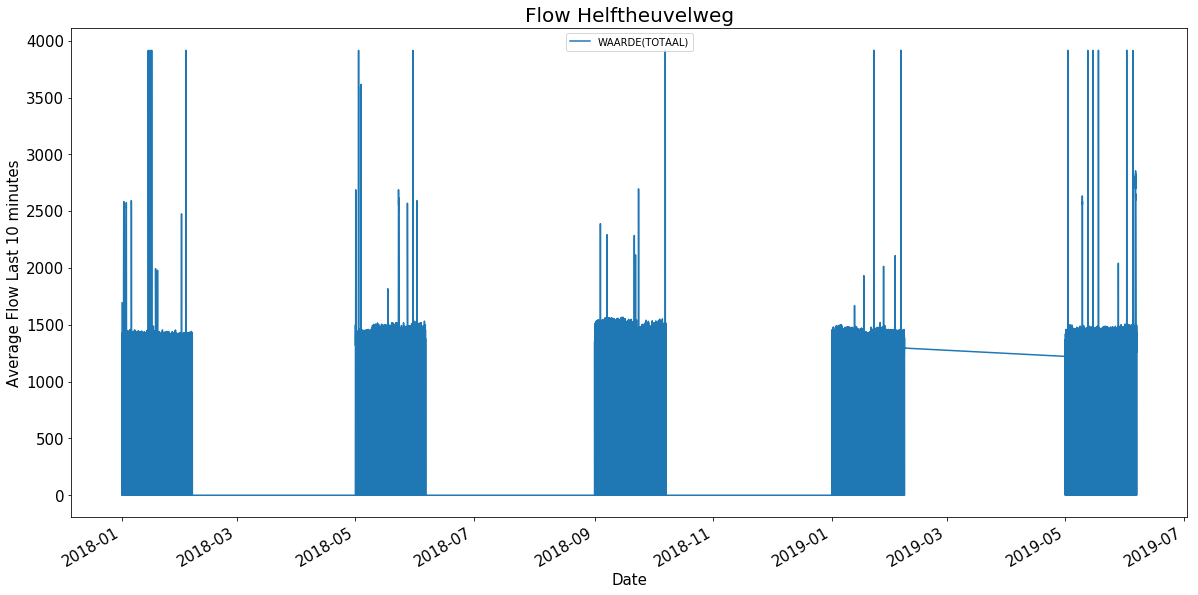

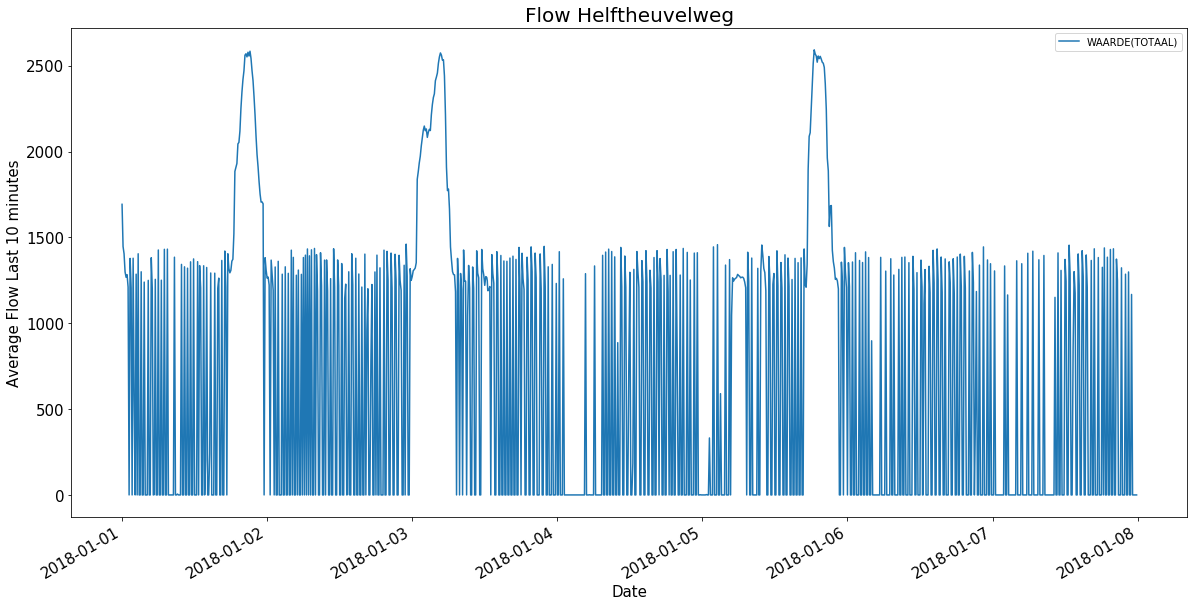

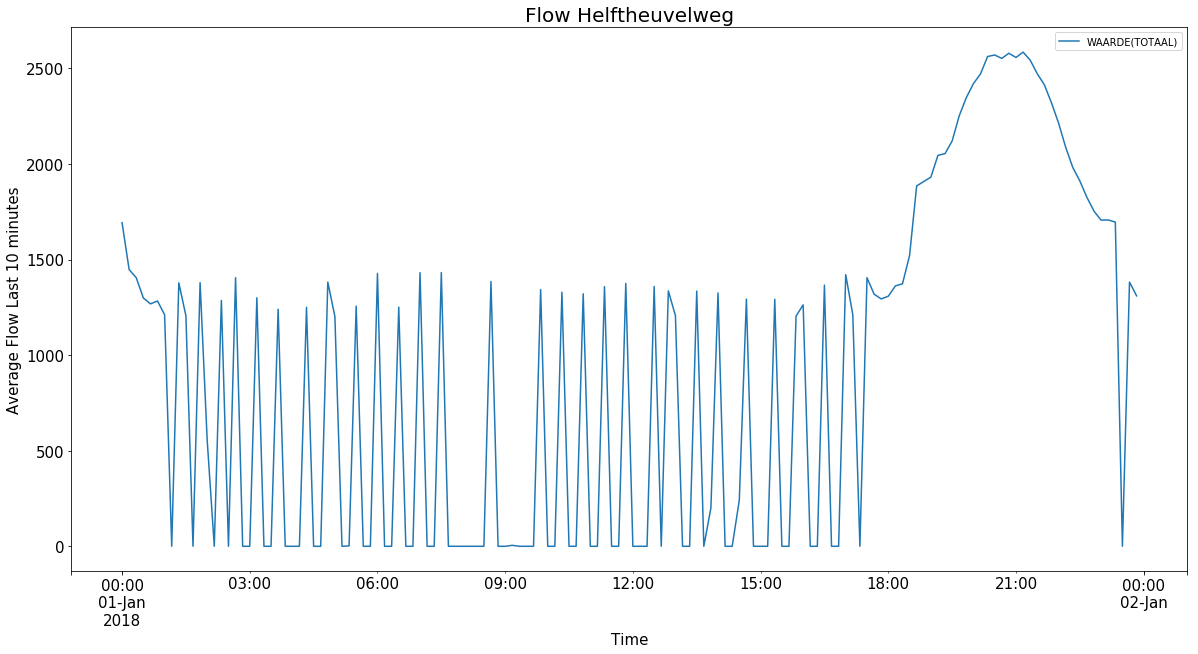

In [30]:
### MAKING THE SAME PLOT AS ABOVE, FOR ALL PUMPS (AGAIN ONE), AND ALSO FOR THE SELECTED TIME SLOTS (DAYS/MONTHS/WHOLE DATA)

data2 = data.groupby(['LOCATIE', 'MEETPUNT'])
for i, df in data2:
    if df['MEETPUNT'].all() == 'Debiet ':
        df['WAARDE(TOTAAL)'] = df['WAARDE(TOTAAL)'].astype(int)
        ax = df.plot(x= 'TIJDSTIP', y = 'WAARDE(TOTAAL)', figsize=(20,10), fontsize=15)
        ax.set_xlabel('Date', size = 15)
        ax.set_ylabel('Average Flow Last 10 minutes', size = 15)
        ax.set_title('Flow Helftheuvelweg', size = 20)
        fig = ax.get_figure()
        fig.savefig('{}/fig1.jpg'.format(path))
        
        week = df[df['TIJDSTIP'].dt.week == 1]
        week = week[week['TIJDSTIP'].dt.year == 2018]
        ax = week.plot(x= 'TIJDSTIP', y = 'WAARDE(TOTAAL)', figsize=(20,10), fontsize=15)
        ax.set_xlabel('Date', size = 15)
        ax.set_ylabel('Average Flow Last 10 minutes', size = 15)
        ax.set_title('Flow Helftheuvelweg', size = 20)
        fig = ax.get_figure()
        fig.savefig('{}/fig2.jpg'.format(path))
        
        day = df[df['TIJDSTIP'].dt.year == 2018]
        day = day[day['TIJDSTIP'].dt.day == 1]
        day = day[day['TIJDSTIP'].dt.month == 1]
        ax = day.plot(x= 'TIJDSTIP', y = 'WAARDE(TOTAAL)', figsize=(20,10), fontsize=15)        
        ax.set_xlabel('Time', size = 15)
        ax.set_ylabel('Average Flow Last 10 minutes', size = 15)
        ax.set_title('Flow Helftheuvelweg', size = 20)
        fig = ax.get_figure()
        fig.savefig('{}/fig3.jpg'.format(path))